# Comparative Analysis of SLMs Performance with Various Preprocessing Techniques in Book Review Generation

Alan, Michael, Mahsa

# 1. Libraries and utils

In [2]:
!pip install -q -U accelerate
!pip install -q -U transformers
!pip install -q datasets
!pip install -q openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.7/223.7 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which 

In [3]:
from transformers import AutoModelForCausalLM, AutoTokenizer, GenerationConfig, Trainer, TrainingArguments, AutoConfig, pipeline
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn.init as init
from openai import OpenAI
import re
import numpy as np
from tqdm import tqdm
import json
from collections import Counter
import nltk
from nltk import pos_tag, word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [4]:
client = OpenAI(api_key="")
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-neo-125M")
local_drive = "/content/drive/MyDrive/"
prompt = """TEST PROMPT, ONlY FOR TESTING PURPOSE"""

tokenizer_config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/357 [00:00<?, ?B/s]

In [1]:
# books_5_raw = load_dataset('parquet', data_files=local_drive+"books_5_raw.parquet", split="train").select(range(0,1000*1000))
# books_5_common = load_dataset('parquet', data_files=local_drive+"books_5_common.parquet", split="train")
# books_5_adj = load_dataset('parquet', data_files=local_drive+"books_5_adj.parquet", split="train")
# books_5_adv = load_dataset('parquet', data_files=local_drive+"books_5_adv.parquet", split="train")

# Use first 10000 reviews as validation set
# dataset_val = load_dataset('parquet', data_files=local_drive+"kin_sto_5_adv.parquet", split="train").select(range(0,10*1000))

# t_books_5_common = load_dataset('parquet', data_files=local_drive+"t_books_5_common.parquet", split="train")

# t_books_5_adj = load_dataset('parquet', data_files=local_drive+"t_books_5_adj.parquet", split="train")

# t_books_5_adv = load_dataset('parquet', data_files=local_drive+"t_books_5_adv.parquet", split="train")

# t_dataset_val = load_dataset('parquet', data_files=local_drive+"t_dataset_val.parquet", split="train")


In [ ]:
# books_5_raw.select(range(120000*8)).push_to_hub("ChunB1/books_raw", token = token)
# books_5_common.select(range(120000*8)).push_to_hub("ChunB1/books_common", token = token)
# books_5_adj.select(range(120000*8)).push_to_hub("ChunB1/books_adj", token = token)
# books_5_adv.select(range(120000*8)).push_to_hub("ChunB1/books_adv", token = token)
# dataset_val.push_to_hub("ChunB1/kindle", token = token)

In [5]:
books_5_common = load_dataset("ChunB1/books_common", split="train")
books_5_adj = load_dataset("ChunB1/books_adj", split="train")
books_5_adv = load_dataset("ChunB1/books_adv", split="train")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/960000 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/960000 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/960000 [00:00<?, ? examples/s]

In [10]:
def gpt3_output(prompt, max_tokens=10):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        temperature=0,
        max_tokens=max_tokens,
        messages=[
            # {"role": "system", "content": "You are a poetic assistant, skilled in explaining complex programming concepts with creative flair."},
            {"role": "user", "content": prompt}
        ]
    )
    return completion.choices[0].message.content


def extract_integers(s):
    pattern = r'\b(?:10|[1-9])\b'
    matches = re.findall(pattern, s)

    return [int(num) for num in matches[:3]]


def prompt_init(story_beginning, story_completion):
    temp1 = """In the following exercise, student is given a beginning of a comment about Amazon Book Review. The student needs to complete it into a complete comment. The exercise tests the student's language abilities and creativity. The symbol *** marks the separator between the prescribed beginning and the student’s completion:
    """

    temp2 = """
    Now, grade the student’s completion in terms of grammar, creativity, and consistency with the comment's beginning. Each metric is ranging from 0 to 10. Please provide the information as a number array only, without additional explanation or text.
    """

    return temp1 + story_beginning + "***" + story_completion + temp2


def scores_from_llm(story_beginning, story_completion):
    prompt = prompt_init(story_beginning, story_completion)
    gpt_output = gpt3_output(prompt)
    scores_list = extract_integers(gpt_output)
    if len(scores_list) == 3:
        return np.array(scores_list)
    else:
        print("Scores_list error: ", gpt_output)
        return np.array([5, 5, 5])


def first_half_of_sentence(sentence):
    words = sentence.split()
    halfway_index = len(words) // 2
    return ' '.join(words[:halfway_index])


def remove_prompt_part(prompt, output_text):
    prompt_words = prompt.split()
    output_text_words = output_text.split()[len(prompt_words):]
    return ' '.join(output_text_words)


def complete_text(model, tokenizer, prompt):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)

    model.config.pad_token_id = model.config.eos_token_id

    input_ids = tokenizer.encode(prompt, return_tensors="pt").to(device)
    output = model.generate(input_ids, max_length=1000, num_beams=1, temperature=0)
    output_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return remove_prompt_part(prompt, output_text)

def complete_text_list(model, tokenizer, story_beginnings_list):
    output_strs = []
    for story_beginning in tqdm(story_beginnings_list):
        output_strs.append(complete_text(model, tokenizer, story_beginning))
    return output_strs

def complete_text_list_gpt3(story_beginnings_list):
    output_strs = []
    for story_beginning in tqdm(story_beginnings_list):
        # Use setting with 100 tokens
        completion_from_gpt3 = gpt3_output(story_beginning, 100)
        output_strs.append(completion_from_gpt3)
    return output_strs

def evaluate_score_from_completions(story_beginnings_list, output_strs):
    scores = []
    for idx, story_beginning in tqdm(enumerate(story_beginnings_list)):
        score = scores_from_llm(story_beginnings_list[0], output_strs[idx])
        scores.append(score)
    scores = np.array(scores)
    avg_score = np.mean(scores, axis=0)
    return scores, avg_score

def performance_df_builder(arr):
    row_labels = ['TinyReviews_raw', 'TinyReviews_common', 'TinyReviews_adj', 'TinyReviews_adv', 'GPT3.5']
    col_labels = ['Creativity', 'Grammar', 'Consistency']
    df = pd.DataFrame(arr, index=row_labels, columns=col_labels)
    return df

def contain_v_n_adj(sentence):
    v = n = adj = False
    tag_tuples = pos_tag(word_tokenize(sentence))
    for tag in tag_tuples:
        if 'VB' in tag[1]:
            v = True
        elif 'NN' in tag[1]:
            n = True
        elif 'JJ' in tag[1]:
            adj = True

        if v == n == adj == True:
            return True
    return False

def contain_v_n_adj_adv(sentence):
    v = n = adj = adv = False
    tag_tuples = pos_tag(word_tokenize(sentence))
    for tag in tag_tuples:
        if 'VB' in tag[1]:
            v = True
        elif 'NN' in tag[1]:
            n = True
        elif 'JJ' in tag[1]:
            adj = True
        elif 'RB' in tag[1]:
            adv = True

        if v == n == adj == adv == True:
            return True
    return False

def plot_word_counts_distribution(list_of_lists, labels):
    word_counts = [[len(sentence.split()) for sentence in inner_list] for inner_list in list_of_lists]

    max_word_count = 60

    bins = np.arange(0, max_word_count + 1, 1)

    plt.figure(figsize=(10, 6))
    for i, counts in enumerate(word_counts):
        plt.hist(counts, bins, alpha=0.5, label=labels[i])

    plt.xlabel('Review length')
    plt.ylabel('Frequency')
    plt.title('Review length distribution between datasets')
    plt.xticks(np.arange(0, max_word_count + 1, 5))
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

def contain_words(sentence, common_words):
    words = sentence.lower().split()
    for word in words:
        if word not in common_words:
            return False
    return True

def reviews_json_gen(original_json_file, output_json_file):
    data_temp = {}
    with open(original_json_file, 'r') as input_file, open(output_json_file, 'w') as output_file:
        for idx, line in tqdm(enumerate(input_file)):
            # Parse each line as a JSON object
            json_obj = json.loads(line)

            review_text = json_obj.get('reviewText', '')
            if len(review_text)<1: continue

            data_temp["text"] = review_text
            json_str = json.dumps(data_temp)
            output_file.write(json_str)
            output_file.write("\n")

def loss_vs_step(log_history):
    steps = []
    train_losses = []
    eval_losses = []

    for idx, h in enumerate(log_history):
        if idx % 2 == 0:
            steps.append(h["step"])
            train_losses.append(h["loss"])
        else:
            eval_losses.append(h["eval_loss"])

    plt.figure(figsize=(10, 6))
    plt.plot(steps, train_losses, label='training loss')
    plt.plot(steps, eval_losses, label='validation loss')

    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.title('Training and Evaluation Loss vs Steps')
    plt.grid(True)

    plt.legend(loc="upper right")
    plt.show()

# 2. Data preprocessing

## 2.1 Common preprocessing

### 2.1.1 Download data

In [ ]:
!wget https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFilesSmall/Books_5.json.gz

--2023-12-13 00:52:24--  https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFilesSmall/Books_5.json.gz
Resolving datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)... 132.239.8.30
Connecting to datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)|132.239.8.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7096438325 (6.6G) [application/x-gzip]
Saving to: ‘Books_5.json.gz’

Books_5.json.gz      62%[===========>        ]   4.10G  10.8MB/s    in 6m 21s  

2023-12-13 00:58:47 (11.0 MB/s) - Connection closed at byte 4403494912. Retrying.

--2023-12-13 00:58:48--  (try: 2)  https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFilesSmall/Books_5.json.gz
Connecting to datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)|132.239.8.30|:443... connected.
HTTP request sent, awaiting response... 206 Partial Content
Length: 7096438325 (6.6G), 2692943413 (2.5G) remaining [application/x-gzip]
Saving to: ‘Books_5.json.gz’

Books_5.json.gz     100%[++++++++++++=====

In [ ]:
!gunzip Books_5.json.gz

In [ ]:
!head Books_5.json

{"overall": 5.0, "verified": false, "reviewTime": "03 30, 2005", "reviewerID": "A1REUF3A1YCPHM", "asin": "0001713353", "style": {"Format:": " Hardcover"}, "reviewerName": "TW Ervin II", "reviewText": "The King, the Mice and the Cheese by Nancy Gurney is an excellent children's book.  It is one that I well remember from my own childhood and purchased for my daughter who loves it.\n\nIt is about a king who has trouble with rude mice eating his cheese. He consults his wise men and they suggest cats to chase away the mice. The cats become a nuisance, so the wise men recommend the king bring in dogs to chase the cats away.  The cycle goes on until the mice are finally brought back to chase away the elephants, brought in to chase away the lions that'd chased away the dogs.\n\nThe story ends in compromise and friendship between the mice and the king.  The story also teaches cause and effect relationships.\n\nThe pictures that accompany the story are humorous and memorable.  I was thrilled to 

In [ ]:
reviews_json_gen("Books_5.json", "Books_5_reviews.json")

27164983it [08:07, 55693.32it/s]


In [ ]:
books_5_raw = load_dataset("json", data_files="Books_5_reviews.json", split = "train")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
books_5_raw.select(range(3))["text"]

["The King, the Mice and the Cheese by Nancy Gurney is an excellent children's book.  It is one that I well remember from my own childhood and purchased for my daughter who loves it.\n\nIt is about a king who has trouble with rude mice eating his cheese. He consults his wise men and they suggest cats to chase away the mice. The cats become a nuisance, so the wise men recommend the king bring in dogs to chase the cats away.  The cycle goes on until the mice are finally brought back to chase away the elephants, brought in to chase away the lions that'd chased away the dogs.\n\nThe story ends in compromise and friendship between the mice and the king.  The story also teaches cause and effect relationships.\n\nThe pictures that accompany the story are humorous and memorable.  I was thrilled to discover that it is back in print.  I *highly* recommend it for children ages 2 to 7.",
 'The kids loved it!',
 'My students (3 & 4 year olds) loved this book!  Definitely recommend it to other teach

In [ ]:
books_5_raw

Dataset({
    features: ['text'],
    num_rows: 27161262
})

In [ ]:
# books_5_raw = books_5_raw.rename_column("reviewText", "text")

In [ ]:
books_5_raw.to_parquet("/content/drive/MyDrive/" + "books_5_raw.parquet")

Creating parquet from Arrow format:   0%|          | 0/27162 [00:00<?, ?ba/s]

14819287331

### 2.1.2 Filter out short (<3 words) and long (>300 words) reviews

In [ ]:
shuffled_dataset = books_5_raw.shuffle(seed=42)

In [ ]:
shuffled_dataset.select(range(1))["reviewText"]

In [ ]:
word_counts = []

In [ ]:
def count_words(example):
    sentence = example['reviewText']
    word_counts.append(len(sentence.split()))
    return example

In [ ]:
sentence = """Once upon a time, in a big forest, there lived a rhinoceros named Roxy. Roxy loved to climb. She climbed trees, rocks, and hills. One day, Roxy found an icy hill. She had never seen anything like it before. It was shiny and cold, and she wanted to climb it.
Roxy tried to climb the icy hill, but it was very slippery. She tried again and again, but she kept falling down. Roxy was sad. She wanted to climb the icy hill so much. Then, she saw a little bird named Billy. Billy saw that Roxy was sad and asked, "Why are you sad, Roxy?"
Roxy told Billy about the icy hill and how she couldn't climb

it. Billy said, "I have an idea! Let's find some big leaves to put under your feet. They will help you climb the icy hill." Roxy and Billy looked for big leaves and found some. Roxy put the leaves under her feet and tried to climb the icy hill again.
This time, Roxy didn't slip. She climbed and climbed until she reached the top of the icy hill. Roxy was so happy! She and Billy played on the icy hill all day. From that day on, Roxy and Billy were the best of friends, and they climbed and played together all the time. And Roxy learned that with a little help from a friend, she could climb anything."""

In [ ]:
len(sentence.split())

235

In [ ]:
subset_dataset = shuffled_dataset.select(range(10000))

In [ ]:
subset_dataset

Dataset({
    features: ['reviewText'],
    num_rows: 10000
})

In [ ]:
subset_dataset.map(count_words)

Map:   0%|          | 0/4109 [00:00<?, ? examples/s]

Dataset({
    features: ['reviewText'],
    num_rows: 4109
})

In [ ]:
len(word_counts)

1000000

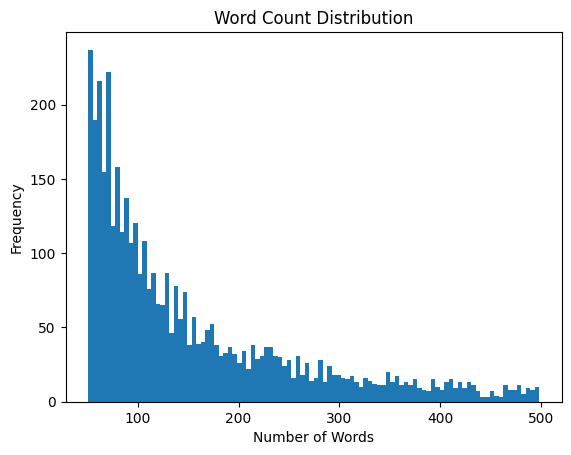

In [ ]:
df = pd.DataFrame(word_counts, columns=["Word Count"])
df["Word Count"].plot(kind="hist", bins=100, title="Word Count Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

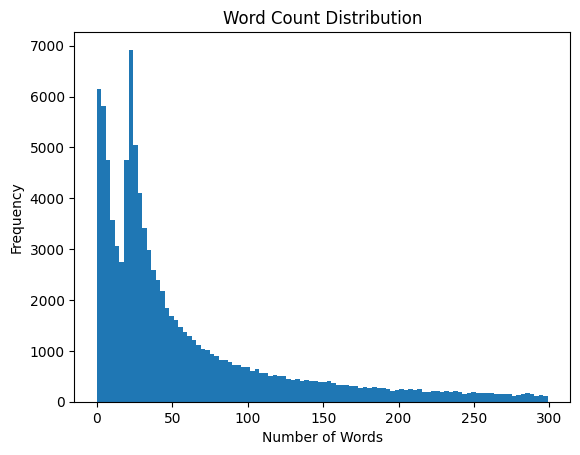

In [ ]:
df = pd.DataFrame(word_counts, columns=["Word Count"])
df["Word Count"].plot(kind="hist", bins=100, title="Word Count Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

In [ ]:
def count_words(example):
    sentence = example['reviewText']
    word_counts.append(len(sentence.split()))
    return example

In [ ]:
subset_dataset = subset_dataset.filter(lambda example: len(example["reviewText"].split())>50 and len(example["reviewText"].split())<500)


Filter:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [ ]:
books_5_raw

Dataset({
    features: ['reviewText'],
    num_rows: 27161262
})

In [ ]:
filtered_dataset_less_300 = books_5_raw.filter(lambda example:
                                                # len(example["reviewText"].split())>50 and
                                                 len(example["reviewText"].split())<300)

Filter:   0%|          | 0/27161262 [00:00<?, ? examples/s]

In [ ]:
filtered_dataset_less_300

Dataset({
    features: ['reviewText'],
    num_rows: 25089206
})

In [ ]:
len(word_counts)

100000

In [ ]:
filtered_dataset_less_300.select(range(100*1000)).map(count_words)

Map:   0%|          | 0/100000 [00:00<?, ? examples/s]

Dataset({
    features: ['reviewText'],
    num_rows: 100000
})

In [ ]:
filtered_dataset_length.to_parquet(local_drive + "books_5_filtered_by_len.parquet")

Creating parquet from Arrow format:   0%|          | 0/11322 [00:00<?, ?ba/s]

9867716933

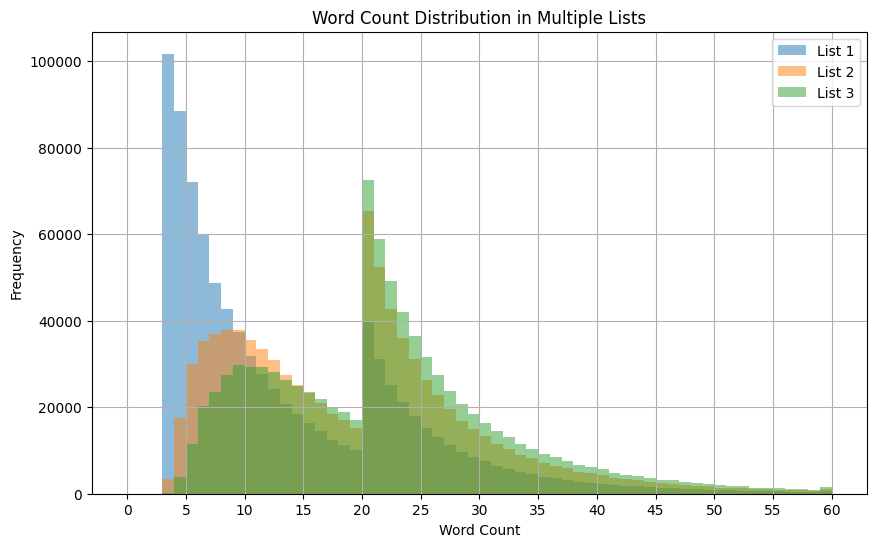

In [ ]:
plot_word_counts_distribution([books_5_common.select(range(900*1000))['reviewText'],
                               books_5_adj.select(range(900*1000))['reviewText'],
                               books_5_adv.select(range(900*1000))['reviewText']])

### 2.1.3 Filter out reviews containing uncommon words (vocabulary size = 20000)

In [ ]:
!wget https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFilesSmall/Musical_Instruments_5.json.gz
!gunzip Musical_Instruments_5.json.gz
reviews_json_gen("Musical_Instruments_5.json", "Musical_Instruments_5_reviews.json")
mus_ins_5_raw = load_dataset("json", data_files="Musical_Instruments_5_reviews.json", split="train")

--2023-12-12 23:24:47--  https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFilesSmall/Musical_Instruments_5.json.gz
Resolving datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)... 132.239.8.30
Connecting to datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)|132.239.8.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39356138 (38M) [application/x-gzip]
Saving to: ‘Musical_Instruments_5.json.gz’

Musical_Instruments 100%[===================>]  37.53M  13.5MB/s    in 2.8s    

2023-12-12 23:24:51 (13.5 MB/s) - ‘Musical_Instruments_5.json.gz’ saved [39356138/39356138]



231392it [00:03, 74353.15it/s]


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
sentences = mus_ins_5_raw['text']
word_counts = Counter()
for sentence in sentences:
    words = sentence.lower().split()
    word_counts.update(words)

most_common_words = dict(word_counts.most_common(20*1000))

print(most_common_words)

{'the': 631561, 'a': 384195, 'i': 368166, 'and': 365939, 'to': 315833, 'it': 238959, 'is': 195096, 'for': 191340, 'of': 186230, 'this': 167573, 'my': 135693, 'with': 126024, 'in': 121028, 'on': 117477, 'you': 116268, 'that': 114292, 'but': 108199, 'have': 93897, 'as': 82501, 'are': 81482, 'not': 80652, 'they': 63538, 'great': 62867, 'was': 61683, 'very': 60760, 'these': 58868, 'so': 58634, 'be': 55385, 'if': 55070, 'good': 54021, 'or': 51455, 'like': 51108, 'just': 49237, 'one': 47708, "it's": 45102, 'guitar': 44994, 'sound': 44472, 'can': 43434, 'at': 42657, 'use': 40694, 'an': 39134, 'more': 37586, 'all': 37537, 'will': 37169, 'your': 36587, 'get': 35809, 'from': 34741, 'when': 34623, 'than': 34329, 'would': 33570, 'up': 33166, 'out': 32953, 'has': 31413, 'no': 30739, 'really': 30454, 'had': 30012, 'strings': 29897, 'what': 29607, 'them': 28478, 'some': 28460, 'well': 27955, 'works': 27501, 'other': 26751, 'little': 26645, "don't": 26456, 'nice': 25111, 'about': 24599, 'do': 24119, '

In [ ]:
books_5_common = filtered_dataset_less_300.filter(lambda example: contain_words(example["reviewText"], most_common_words))

Filter:   0%|          | 0/25089206 [00:00<?, ? examples/s]

In [ ]:
books_5_common

Dataset({
    features: ['reviewText'],
    num_rows: 3544404
})

In [ ]:
books_5_common.select(range(293000,293002))['reviewText']

['I Read this book over a weekend and could not put it down!  I love her writing style and have since purchased another book written by her. Really makes you think everyone should get a wake up call like this.',
 'to think this happened in my lifetime is hard to believe. easy read, great story just get it and see.']

In [ ]:
books_5_common = books_5_common.filter(lambda example:
                                                 len(example["reviewText"].split())>2)

In [ ]:
books_5_common

Dataset({
    features: ['text'],
    num_rows: 2522205
})

In [ ]:
books_5_common = books_5_common.rename_column("reviewText", "text")

In [ ]:
books_5_common.to_parquet("/content/drive/MyDrive/" + "books_5_common.parquet")

Creating parquet from Arrow format:   0%|          | 0/2523 [00:00<?, ?ba/s]

182243226

## 2.2 Keep reviews containing at least one V, N and ADJ.

In [ ]:
books_5_adj = books_5_common.filter(lambda example: contain_v_n_adj(example["reviewText"]))

Filter:   0%|          | 0/3544404 [00:00<?, ? examples/s]

In [ ]:
books_5_adj

Dataset({
    features: ['text'],
    num_rows: 1352081
})

In [ ]:
books_5_adj = books_5_adj.rename_column("reviewText", "text")

In [ ]:
books_5_adj.to_parquet("/content/drive/MyDrive/" + "books_5_adj.parquet")

Creating parquet from Arrow format:   0%|          | 0/1353 [00:00<?, ?ba/s]

135594814

In [ ]:
books_5_adj.select(range(300, 310))["reviewText"]

['I think this is the 2nd book in the series I read.  It was very distracting with the constant mention of styles but I know that what makes it unique.',
 "First of his books I have read. Really looking forward to more. I'm curious about the mist born books now",
 'The beginning takes a  little time. But when you are a little bit further I find it an easy reading\nand a story where you can find things happening in the real world',
 'I think that goes to show just how much i enjoyed it\ni highly recommend this book whether you have read his work before or not',
 "The story just sucks you in, I had a hard time putting it down every night which isn't always the case with me as I get bored in stories easily.  I am looking forward to Day 2.",
 "At first I was thinking I wasn't going to like it. But each page I keep turning and couldn't put it down. Im ready for book 2.",
 'Very good story. It kept me guessing at who the bad guy would be. But never in a million years would I have guess as to

## 2.3 Keep reviews containing at least one V, N, ADJ and ADV.

In [ ]:
books_5_adv = books_5_common.filter(lambda example: contain_v_n_adj_adv(example["reviewText"]))

Filter:   0%|          | 0/3544404 [00:00<?, ? examples/s]

In [ ]:
books_5_adv

Dataset({
    features: ['text'],
    num_rows: 973975
})

In [ ]:
books_5_adv = books_5_adv.rename_column("reviewText", "text")

In [ ]:
books_5_adv.to_parquet("/content/drive/MyDrive/" + "books_5_adv.parquet")

Creating parquet from Arrow format:   0%|          | 0/974 [00:00<?, ?ba/s]

110945889

In [ ]:
books_5_adv.select(range(300, 310))["reviewText"]

['Boy can this man write never a bad book and I have read most of his books to date and this is up there with the best of them . More please and soon',
 'Better than the first book in the series, the sad thing I hope will not take another 4 years to the next book in the series.',
 'Amazing book, you absolutely must read.',
 'Enjoyed the series very much and am anxious for the next book.  Hope to see it on the shelf soon.',
 'This is the first review I have ever written about a book. I will keep it short.  Do yourself a favor and buy this book!',
 'I genuinely believe that this series, after just reading book 1,  will go down as on of the greatest all time.',
 'I really got into this book and read it all in about three days. That is saying something for me due to my inability to get into books very easy. You should read it, I think you will like it just as much as I did.',
 "Didn't expect this book to be nearly as good as it is! Though it was a longer book, I could barely put it down!",

## 2.4 Build Validation set

In [ ]:
!wget https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFilesSmall/Kindle_Store_5.json.gz
!gunzip Kindle_Store_5.json.gz

In [ ]:
reviews_json_gen("Kindle_Store_5.json", "Kindle_Store_5_reviews.json")

2222983it [00:36, 61436.98it/s]


In [ ]:
kin_sto_5_raw = load_dataset("json", data_files="Kindle_Store_5_reviews.json", split="train")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
most_common_words

In [ ]:
kin_sto_5_raw, len(most_common_words)

(Dataset({
     features: ['text'],
     num_rows: 2222580
 }),
 20000)

In [ ]:
kin_sto_5_adv = kin_sto_5_raw.filter(lambda example:
                                        len(example["text"].split())<300 and
                                        contain_words(example["text"], most_common_words) and
                                        contain_v_n_adj_adv(example["text"]))

Filter:   0%|          | 0/2222580 [00:00<?, ? examples/s]

In [ ]:
kin_sto_5_adv

Dataset({
    features: ['text'],
    num_rows: 75571
})

In [ ]:
kin_sto_5_adv.select(range(1,10))['text']

['I was hoping to find this one in book form. The story looks like it will be good when I get that far in the series.',
 'This true story is amazing.  All the things he did and got away with for so long, a nd the good person he is now.',
 'One of the most interesting books I have read in some time. It was well worth the time I spent',
 "I love this book. Strong woman who's the main perspective. The rest of the series are really drawing me in as well. I can't wait to take the trip together and get lost in another world.",
 "I enjoyed this book, but didn't think it was as good as the others.",
 'I like very good products.',
 "I didn't read the book yet but I'm sure it could possibly be a four.",
 'Learning history is learning the good the bad and the ugly.  I encourage to read this book and see how flawed their thinking was.',
 'It was an interesting read in 40+ years ago in HS but is really dated now.']

In [ ]:
kin_sto_5_adv.to_parquet("/content/drive/MyDrive/" + "kin_sto_5_adv.parquet")

Creating parquet from Arrow format:   0%|          | 0/76 [00:00<?, ?ba/s]

9225113

# 3. Model and Dataset explaination (result)

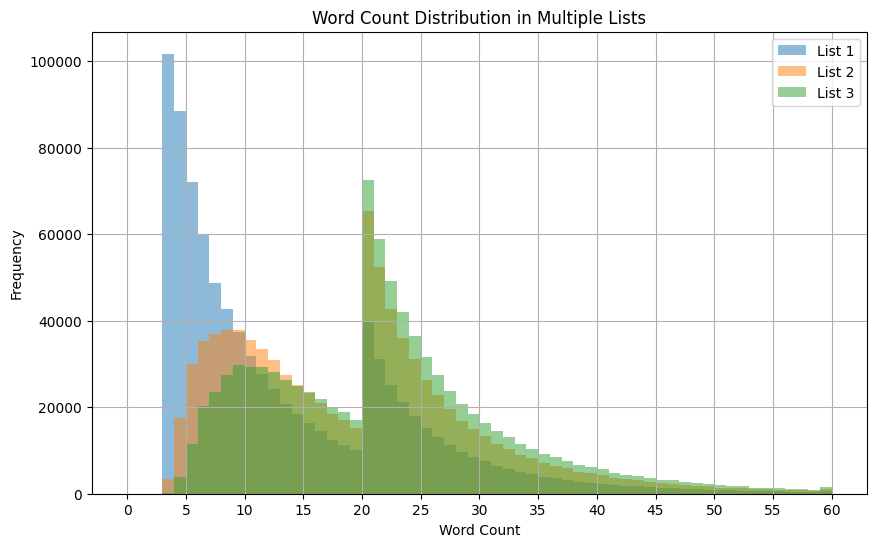

In [ ]:
plot_word_counts_distribution([books_5_common.select(range(900*1000))['reviewText'],
                               books_5_adj.select(range(900*1000))['reviewText'],
                               books_5_adv.select(range(900*1000))['reviewText']])

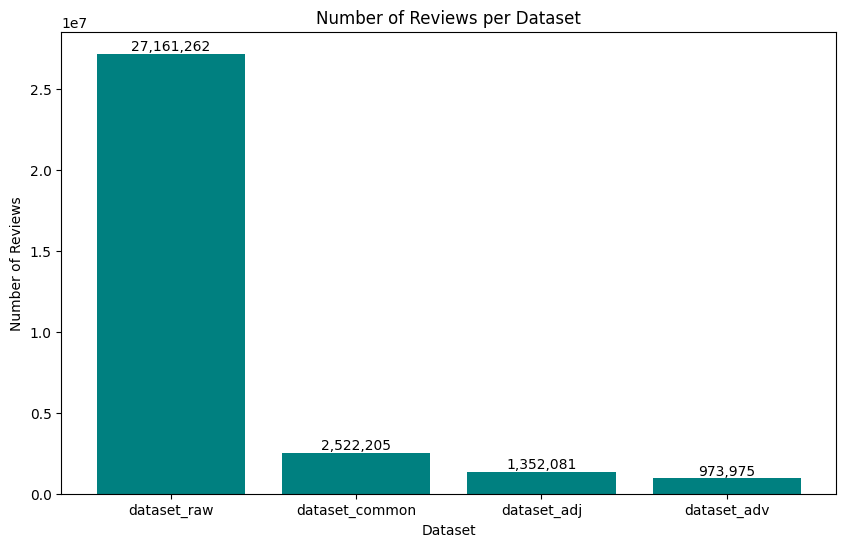

In [ ]:
datasets = ['dataset_raw', 'dataset_common', 'dataset_adj', 'dataset_adv']
reviews = [27161262, 2522205, 1352081, 973975]

plt.figure(figsize=(10,6))

bars = plt.bar(datasets, reviews, color='teal')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,}', ha='center', va='bottom')


plt.title('Number of Reviews per Dataset')
plt.xlabel('Dataset')
plt.ylabel('Number of Reviews')


plt.show()

In [ ]:
model = AutoModelForCausalLM.from_pretrained('ChunB1/TinyReviews_raw')
model

GPTNeoForCausalLM(
  (transformer): GPTNeoModel(
    (wte): Embedding(50257, 64)
    (wpe): Embedding(2048, 64)
    (drop): Dropout(p=0.0, inplace=False)
    (h): ModuleList(
      (0-7): 8 x GPTNeoBlock(
        (ln_1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (attn): GPTNeoAttention(
          (attention): GPTNeoSelfAttention(
            (attn_dropout): Dropout(p=0.0, inplace=False)
            (resid_dropout): Dropout(p=0.0, inplace=False)
            (k_proj): Linear(in_features=64, out_features=64, bias=False)
            (v_proj): Linear(in_features=64, out_features=64, bias=False)
            (q_proj): Linear(in_features=64, out_features=64, bias=False)
            (out_proj): Linear(in_features=64, out_features=64, bias=True)
          )
        )
        (ln_2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (mlp): GPTNeoMLP(
          (c_fc): Linear(in_features=64, out_features=256, bias=True)
          (c_proj): Linear(in_features=256, out_

Motivation:

Our goal is to construct a dataset that is not only small and cost-effective but also capable of enabling SLMs to generate high-quality reviews. In the Tinystories paper, they use GPT3.5 to create a synthetic corpus with a vocabulary size of 1500, ensuring that each data point includes at least one verb, noun, and adjective. This 2M rows dataset enables SLMs to learn the data pattern efficiently. To reduce the training costs associated with language models, we have decided to create a customized dataset from the existing large corpus of Amazon reviews by Ni. Additionally, we have included adverbs in our dataset, which may capture the semantic knowledge behind the words.

Reproduciblity:

We set zero temperature across all models mentioned in this report. The models, training datasets, validation dataset are available on Hugginface named TinyReviews_raw/common/adv/adj, books_raw/common/adv/adj and kindle for reproducibility purpose.

Description of the customized GPT-neo model:

We use a model architecture similar to that designed by TinyStories, which includes embedding layers with a hidden size of 64 and 8 transformer blocks. It also features a small Multi-Layer Perceptron (MLP) with 64 input features and 256 output features after the transformer layers, providing local information transformation at each position separately. Benefiting from its simplified layers containing 1 million parameters, this SLM is capable to generate coherent, grammatically correct sentences after only a few hours of training on a single V100 GPU.


Description of Book Reviews Dataset:

To explore the impact of different preprocessing techniques, we built a pipeline and constructed four datasets from the original Amazon Review data by Ni. Our pipeline consists of four steps:

1. The common preprocessing technique filters out reviews that are shorter than three words or longer than five hundred words. Super-short reviews do not improve the model's reasoning capability significantly, and super-long reviews may slow down the training speed.

2. Construct a common-word dictionary dataset with a vocabulary size 20,000 using 231,392 music instrument reviews. Although this dictionary contains some noise data, such as the actual uncommon words and words containing punctuations, it includes enough actual common words based on its 20,000 size. This approach, which does not involve computationally heavy preprocessing techniques such as lemmatization, still ensures that the processed reviews have a limited vocabulary size after our manual verification. Then, we filter out reviews that are outside the common words dictionary.

3. Utilize NLTK's POS tagger to retain reviews containing at least one verb, noun, and adjective.

4. Follow a strategy similar to the previous step but retain reviews containing at least one verb, noun, adverb, and adjective.

As shown in Figure 99, the number of reviews decreases gradually after applying more preprocessing techniques, and even the smallest dataset takes 3-5 hours to train a tiny SLM on one V100 GPU. Another note is that each more extensive dataset includes all data in the smaller ones. From this pipeline, we construct a smaller dataset that has much higher quality.

Reference:
Justifying recommendations using distantly-labeled reviews and fined-grained aspects
Jianmo Ni, Jiacheng Li, Julian McAuley
Empirical Methods in Natural Language Processing (EMNLP), 2019

1. Most reveiws are less ten words in baseline dataset (only filtered out uncommon words).
2. Most reviews are below 30 words in adj and adv dataset.

# 4. Training GPT-neo from zero

## 4.1 Tokenize dataset

In [ ]:
tokenizer.pad_token = tokenizer.eos_token
def tokenize_function(examples):
    # GPT-Neo architecture with window size 256 and context length 512
    tokenized_output = tokenizer(examples['text'], padding='max_length', truncation=True, max_length=512)
    # GPT-Neo expects labels for language modeling
    tokenized_output["labels"] = tokenized_output["input_ids"].copy()
    return tokenized_output

In [ ]:
t_books_5_common = books_5_common.map(tokenize_function, batched=True)
t_books_5_common.to_parquet(local_drive + "t_books_5_common.parquet")

Map:   0%|          | 0/2522205 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2523 [00:00<?, ?ba/s]

17000306166

In [ ]:
t_books_5_adj = books_5_adj.map(tokenize_function, batched=True)
t_books_5_adj.to_parquet(local_drive + "t_books_5_adj.parquet")

Map:   0%|          | 0/1352081 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/1353 [00:00<?, ?ba/s]

9151270922

In [ ]:
t_books_5_adv = books_5_adv.map(tokenize_function, batched=True)
t_books_5_adv

Map:   0%|          | 0/973975 [00:00<?, ? examples/s]

Dataset({
    features: ['text', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 973975
})

In [ ]:
t_dataset_val = dataset_val.map(tokenize_function, batched=True)

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [ ]:
t_books_5_adv.to_parquet(local_drive + "t_books_5_adv.parquet")

Creating parquet from Arrow format:   0%|          | 0/974 [00:00<?, ?ba/s]

6605411189

In [ ]:
t_dataset_val.to_parquet(local_drive + "t_dataset_val.parquet")

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

67981861

## 4.2 Training

In [ ]:
"""I didn't read the book yet but I'm sure it could possibly be a four."""

prompt = """I didn't read the book yet but"""

### 4.2.1 base_line_common

In [ ]:
t_books_5_common = t_books_5_common.select(range(1000*1000))
t_books_5_common

Dataset({
    features: ['text', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 1000000
})

In [ ]:
# Without pretrained weights
config = AutoConfig.from_pretrained('roneneldan/TinyStories-1M')
model_from_zero = AutoModelForCausalLM.from_config(config).to("cuda")

In [ ]:
result = complete_text(model_from_zero, tokenizer, prompt)
result

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'unlawfully 640 640 640 640 640 640 640 640 640riotsriots strategic strategic strategic strategic strategic strategic Racing intercourse horribly horribly horribly horribly MAN MAN MAN "... "... adjoining adjoining 320butt Maze Island IslandShopShop176176176 diagnoses diagnoses diagnoses diagnoses diagnoses diagnoses diagnoses diagnoses diagnoses diagnoses diagnoses diagnoses diagnoses diagnoses diagnoses diagnoses diagnoses diagnoses diagnoses diagnoses diagnoses diagnoses diagnoses diagnoses diagnoses diagnoses diagnoses diagnoses diagnoses diagnoses diagnoses rose rose surfacenainainainainainainainainainainainainainainainainainainaiapolis Bett glory glory Scott Scott horribly analyzing redundancy redundancy redundancy redundancy redundancy redundancy redundancy redundancy redundancy redundancy redundancy adjoiningAdManchester mall mall mall mallASED sanctions Ras467467467467467467467467467467467467467467467467467467467467467467467467 commitideideide calibrated calibrated calibrated 

In [ ]:
# Validation is way too slow
t_dataset_val_1 = t_dataset_val.select(range(1))
t_dataset_val_1["text"]

['ALMOST BEEN TOO LONG SINCE I READ IT. GOOD READ OR I WOULD NOT HAVE FINISHED IT']

In [ ]:
training_args = TrainingArguments(
    output_dir=local_drive + "results_common",
    per_device_train_batch_size=8,
    num_train_epochs=1,
    logging_dir=local_drive + "logs_common",
    logging_steps=10,
    save_steps = 5000,
    evaluation_strategy="steps",
    # resume_from_checkpoint=checkpoint_path,

    # save_total_limit=1,
    # load_best_model_at_end = True
)

trainer = Trainer(
    model=model_from_zero,
    args=training_args,
    train_dataset = t_books_5_common,
    eval_dataset = t_dataset_val_1,

)

In [ ]:
trainer.train()
# trainer.train(resume_from_checkpoint=True)
model_name = "books_common_1M"
model_from_zero.push_to_hub(model_name, use_auth_token=token)
tokenizer.push_to_hub(model_name, use_auth_token=token)

Step,Training Loss,Validation Loss
10,10.073000,9.683258
20,9.556200,9.503379
30,9.442000,9.426456
40,9.363700,9.361741
50,9.301500,9.300858
60,9.241500,9.239595
70,9.176600,9.179721
80,9.111700,9.119151
90,9.051100,9.058146
100,8.992200,8.996553


/usr/local/lib/python3.10/dist-packages/transformers/utils/hub.py:821: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


model.safetensors:   0%|          | 0.00/15.0M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/utils/hub.py:821: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


CommitInfo(commit_url='https://huggingface.co/ChunB1/books_common_1M/commit/110bc50a12d22bee3fcb12c37dfb730c9b31fc15', commit_message='Upload tokenizer', commit_description='', oid='110bc50a12d22bee3fcb12c37dfb730c9b31fc15', pr_url=None, pr_revision=None, pr_num=None)

### 4.2.2 model_adj

In [ ]:
# From checkpoint
# checkpoint_path = local_drive + "results_adv/checkpoint-95000"
# model_from_zero = AutoModelForCausalLM.from_pretrained(checkpoint_path)

In [ ]:
# Without pretrained weights
config = AutoConfig.from_pretrained('roneneldan/TinyStories-1M')
model_from_zero = AutoModelForCausalLM.from_config(config).to("cuda")

config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

In [ ]:
result = complete_text(model_from_zero, tokenizer, prompt)
result

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'Spo Bobby Bobby Bobby Bobby penaltyomniaomniaomniaomniaomniaWMiza Benefitylene mega mega casc casc casc casc casc casc casc casc cascANT steroid steroidiseiseoit)=()=(License Elk Customer W Elk Dmit Dmit Dmitetsketsk implicitly portray Rouhani helicopannelsannelsannelsannelsannelschantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantchantcha

In [ ]:
# Validation is way too slow
t_dataset_val_1 = t_dataset_val.select(range(1))
t_dataset_val_1["text"]

['ALMOST BEEN TOO LONG SINCE I READ IT. GOOD READ OR I WOULD NOT HAVE FINISHED IT']

In [ ]:
training_args = TrainingArguments(
    output_dir=local_drive + "results_adj",
    per_device_train_batch_size=8,
    num_train_epochs=1,
    logging_dir=local_drive + "logs_adj",
    logging_steps=10,
    save_steps = 5000,
    evaluation_strategy="steps",
    # resume_from_checkpoint=checkpoint_path,

    # save_total_limit=1,
    # load_best_model_at_end = True
)

trainer = Trainer(
    model=model_from_zero,
    args=training_args,
    train_dataset = t_books_5_adj,
    eval_dataset = t_dataset_val_1,

)

In [ ]:
trainer.train()
# trainer.train(resume_from_checkpoint=True)

Step,Training Loss,Validation Loss
10,10.077100,9.762031
20,9.658200,9.614865
30,9.561200,9.543824
40,9.498400,9.483899
50,9.441400,9.426843
60,9.382200,9.370127
70,9.327500,9.313820
80,9.262400,9.256383
90,9.201700,9.198627
100,9.144800,9.139751


In [ ]:
model_name = "books_adj_1M"
model_from_zero.push_to_hub(model_name, use_auth_token=token)
tokenizer.push_to_hub(model_name, use_auth_token=token)

### 4.2.3 model_adv

In [ ]:
# From checkpoint
checkpoint_path = local_drive + "results_adv/checkpoint-95000"
model_from_zero = AutoModelForCausalLM.from_pretrained(checkpoint_path)

In [ ]:
# Without pretrained weights
config = AutoConfig.from_pretrained('roneneldan/TinyStories-1M')
model_from_zero = AutoModelForCausalLM.from_config(config).to("cuda")

In [ ]:
result = complete_text(model_from_zero, tokenizer, prompt)
result

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'I was not sure what I expected. I would recommend it to anyone.'

In [ ]:
# Validation is way too slow
t_dataset_val_1 = t_dataset_val.select(range(1))
t_dataset_val_1["text"]

['ALMOST BEEN TOO LONG SINCE I READ IT. GOOD READ OR I WOULD NOT HAVE FINISHED IT']

In [ ]:
training_args = TrainingArguments(
    output_dir=local_drive + "results_adv",
    per_device_train_batch_size=8,
    num_train_epochs=1,
    logging_dir=local_drive + "logs_adv",
    logging_steps=10,
    save_steps = 5000,
    evaluation_strategy="steps",
    # resume_from_checkpoint=checkpoint_path,

    # save_total_limit=1,
    # load_best_model_at_end = True
)

trainer = Trainer(
    model=model_from_zero,
    args=training_args,
    train_dataset = t_books_5_adv,
    eval_dataset = t_dataset_val_1,

)

In [ ]:
# trainer.train()
trainer.train(resume_from_checkpoint=True)

There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss,Validation Loss
95010,0.161800,0.361023
95020,0.153100,0.360656
95030,0.180700,0.360593
95040,0.191800,0.361909
95050,0.164000,0.362108
95060,0.169300,0.360979
95070,0.192000,0.359764
95080,0.155000,0.360515
95090,0.165900,0.360543
95100,0.177000,0.360054


/usr/local/lib/python3.10/dist-packages/transformers/utils/hub.py:821: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


model.safetensors:   0%|          | 0.00/15.0M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/utils/hub.py:821: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


CommitInfo(commit_url='https://huggingface.co/ChunB1/books_adv_1M/commit/fe4f92a434a39efced22907dd78e1a9ae5070547', commit_message='Upload tokenizer', commit_description='', oid='fe4f92a434a39efced22907dd78e1a9ae5070547', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
model_name = "books_adv_1M"
model_from_zero.push_to_hub(model_name, use_auth_token=token)
tokenizer.push_to_hub(model_name, use_auth_token=token)

/usr/local/lib/python3.10/dist-packages/transformers/utils/hub.py:821: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


model.safetensors:   0%|          | 0.00/15.0M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/utils/hub.py:821: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


CommitInfo(commit_url='https://huggingface.co/ChunB1/books_adv_1M/commit/fe5720aa0e60b7e47ab7c81bbb0849a2f39ca00e', commit_message='Upload tokenizer', commit_description='', oid='fe5720aa0e60b7e47ab7c81bbb0849a2f39ca00e', pr_url=None, pr_revision=None, pr_num=None)

## 4.3 Training plots (result)

### 4.3.1 TinyReviews_raw loss plot

In [ ]:
with open(local_drive + "results_550/checkpoint-125000/trainer_state.json", 'r') as file:
    log_history = json.load(file)['log_history']
len(log_history)

12500

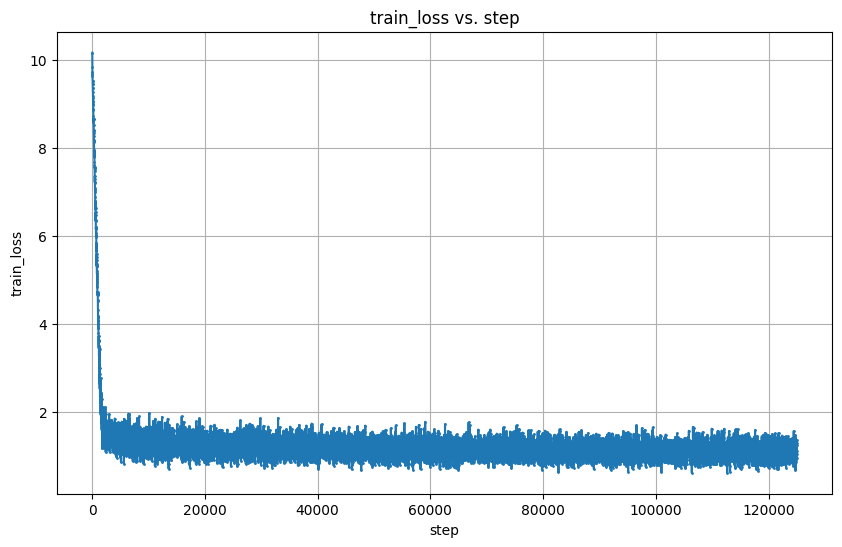

In [ ]:
steps = [item['step'] for item in log_history]
losses = [item['loss'] for item in log_history]

plt.figure(figsize=(10, 6))
plt.plot(steps, losses, marker='o', markersize=1)
plt.title("train_loss vs. step")
plt.xlabel("step")
plt.ylabel("train_loss")
plt.grid(True)
plt.show()

Unstable

### 4.3.2 TinyReviews_common loss plot

In [ ]:
with open(local_drive + "results_common/checkpoint-125000/trainer_state.json", 'r') as file:
    log_history = json.load(file)['log_history']

len(log_history)

25000

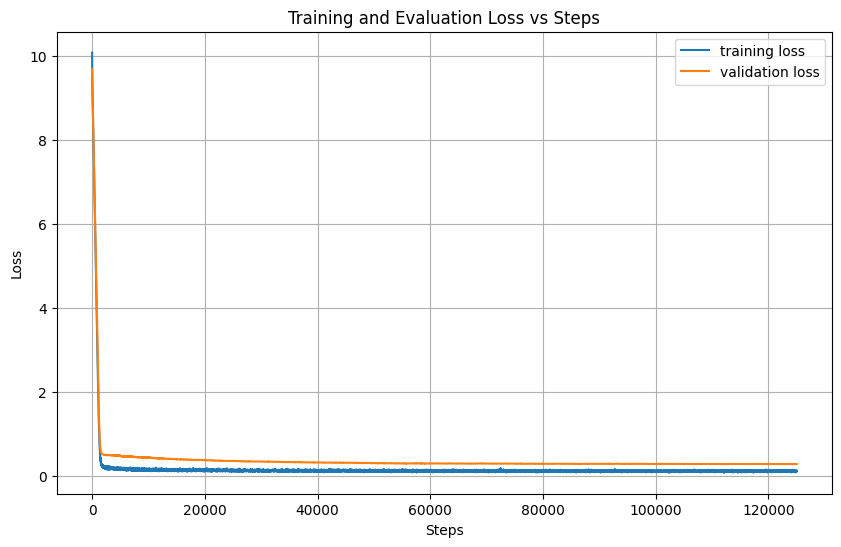

In [ ]:
loss_vs_step(log_history)

### 4.3.3 TinyReviews_adj loss plot

In [ ]:
with open(local_drive + "results_adj/checkpoint-150000/trainer_state.json", 'r') as file:
    log_history = json.load(file)['log_history']

len(log_history)

30000

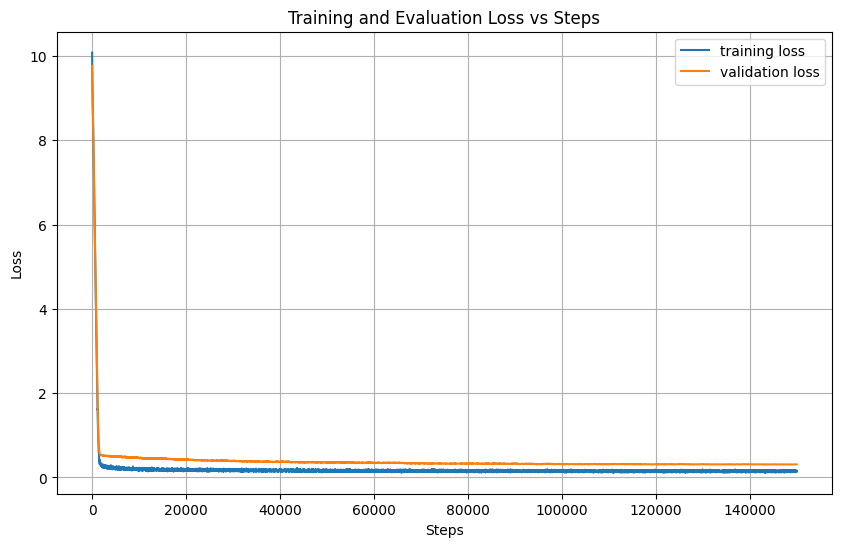

In [ ]:
loss_vs_step(log_history)

### 4.3.4 TinyReviews_adv loss plot

In [ ]:
with open(local_drive + "results_adv/checkpoint-120000/trainer_state.json", 'r') as file:
    log_history = json.load(file)['log_history']

len(log_history)

24000

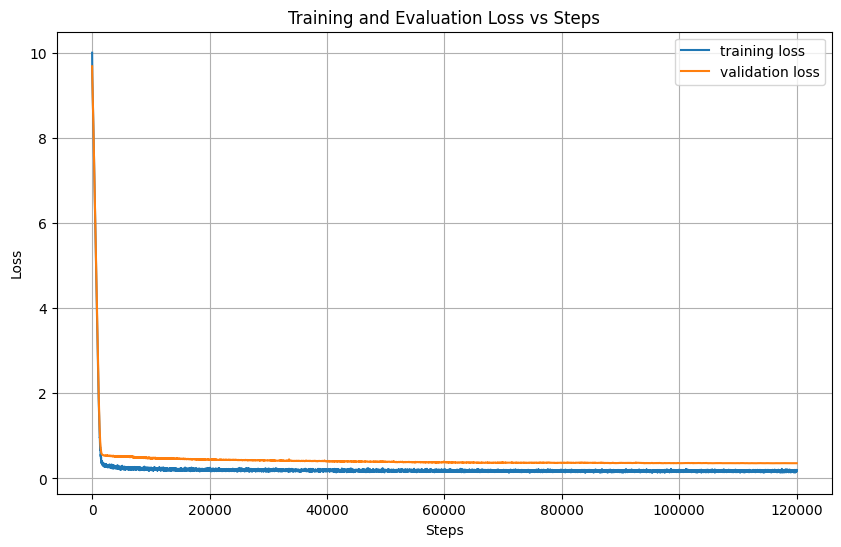

In [ ]:
loss_vs_step(log_history)

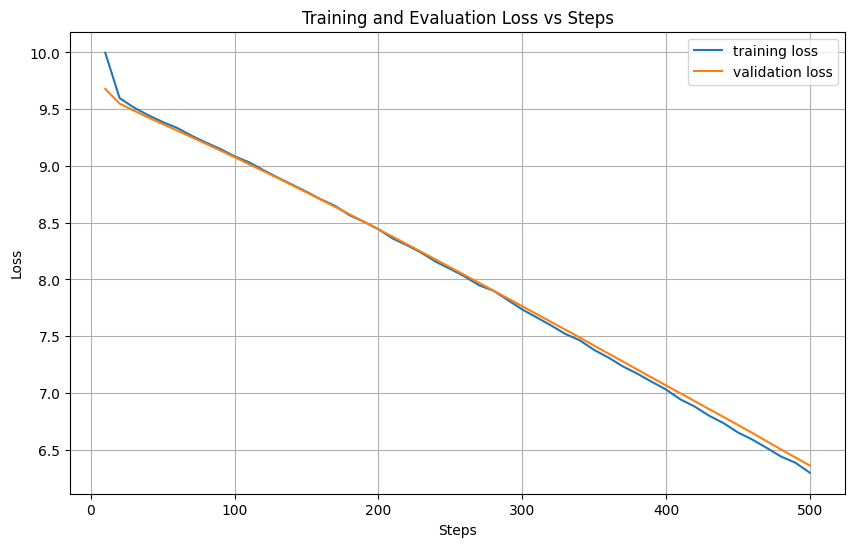

In [ ]:
loss_vs_step(log_history[0:100])

Training process:

We train four GPT-Neo models with the same architecture and randomly initialized weights on an equal amount of data, first 900,000 reviews from our four previously constructed datasets. We only use one Kindle review in the validation dataset, which was not present in the book review training dataset to speed up the training speed. This setup allowed us to make a fair comparison among different preprocessing techniques, as they are the only variable between the four models. There are two interesting observations:

1. Due to the significant amount of noise in the raw dataset, the training loss of the first model was unstable, as shown in Figure 99. This indicates that the model spent time learning insignificant patterns.
2. After approximately 200 steps (equivalent to 1600 reviews), the model consistently exhibited lower training loss compared to the validation loss, suggesting that it begans to learn the common patterns from the training dataset in the very beginning.

# 5. Evaluate TinyReviews models

## 5.1 GPT-eval

### 5.1.1 Build Test set

In [ ]:
# Use another 50 reviews as test set to conduct gpt-eval

In [ ]:
dataset_val = load_dataset("ChunB1/kindle", split="train").select(range(5000))

In [ ]:
first_half_reviews = [first_half_of_sentence(r) for r in dataset_val['text']]

In [ ]:
model_raw = AutoModelForCausalLM.from_pretrained('ChunB1/TinyReviews_raw')
model_common= AutoModelForCausalLM.from_pretrained('ChunB1/TinyReviews_common')
model_adj = AutoModelForCausalLM.from_pretrained('ChunB1/TinyReviews_adj')
model_adv = AutoModelForCausalLM.from_pretrained('ChunB1/TinyReviews_adv')

config.json:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/15.0M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/144 [00:00<?, ?B/s]

In [ ]:
def reviews_test_builder(models, tokenizer, first_half_reviews):
    reviews_text = []
    for first_half in first_half_reviews:
        review_len_set = set()
        for model in models:
            review_len = len(complete_text(model, tokenizer, first_half).split())
            review_len_set.add(review_len)

            if review_len < 5: break
        if min(review_len_set) > 5:
            reviews_text.append(first_half)
        if len(reviews_text)==50: break

    return reviews_text

In [ ]:
reviews_test = reviews_test_builder([model_raw, model_common, model_adj, model_adv], tokenizer, first_half_reviews)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


In [ ]:
len(reviews_test)

50

In [ ]:
reviews_test[0:5]

['I was hoping to find this one in book form. The story looks',
 'Learning history is learning the good the bad and the ugly. I',
 'After reading how I feel about the book. I have listened to him speak about his experience and I was touched and moved. I need',
 'I had checked out this book from the library. This book was absolutely amazing.',
 'I can not come up with anything new to say.']

### 5.1.2 TinyReviews_raw GPT-eval

In [ ]:
completions_raw = complete_text_list(model_raw, tokenizer, reviews_test)
completions_raw[0:10]

  0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
100%|██████████| 50/50 [01:37<00:00,  1.96s/it]


['like a little more than the book. I was a lot of reading about the book. I was a lot of reading about the book. I was a lot of reading about the book. I was a lot of reading about the book. I was surprised that I was a lot of reading about the book. I was a fan of the book. I was a fan of the book and I was disappointed. I was a fan of the book. I was a fan of the book and I was disappointed. I was a fan of the book. I was a fan of the book. I was a fan of the book. I was a fan of the book. I was a fan of the book. I was a fan of the book. I was a fan of the book. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the ser

In [ ]:
scores_raw, avg_scores_raw = evaluate_score_from_completions(reviews_test, completions_raw)

50it [00:50,  1.01s/it]


In [ ]:
avg_scores_raw

array([7.58, 6.24, 6.7 ])

### 5.1.3 TinyReviews_common GPT-eval

In [ ]:
completions_common = complete_text_list(model_common, tokenizer, reviews_test)
completions_common

100%|██████████| 50/50 [00:04<00:00, 10.71it/s]


['good. I would recommend it to anyone.',
 'am very happy with the book.',
 'to read the book in the series.',
 'I would recommend it to anyone who is a great book.',
 'I am very happy with the book. I would recommend this book to anyone.',
 "didn't want to put it down. I would recommend it to anyone.",
 'it to anyone who is a good read.',
 'a book to be a great book.',
 'of her books. I have read all of her books and I have read all of them.',
 'you have to read. I have to read this book and I have to read it again. I have to read it again.',
 'better than the first book. I have read the first book and I would recommend it to anyone.',
 'It was a good read. I would recommend it to anyone.',
 'have read the book and I am glad I read it.',
 'of my favorite books I have read in a lot of them.',
 'I would recommend it to anyone.',
 'and I am looking forward to the next book.',
 'and I am very happy with the book.',
 'of the book is very interesting and I would recommend it to anyone.',
 '

In [ ]:
scores_common, avg_scores_common = evaluate_score_from_completions(reviews_test, completions_common)

50it [00:45,  1.09it/s]


In [ ]:
avg_scores_common

array([7.98, 6.92, 8.98])

### 5.1.4 TinyReviews_adj GPT-eval

In [ ]:
completions_adj = complete_text_list(model_adj, tokenizer, reviews_test)
completions_adj

100%|██████████| 50/50 [00:04<00:00, 10.90it/s]


['like a lot of the book. I would recommend it to anyone.',
 'have read it in a few days.',
 'to read the next book in the series.',
 'I would recommend it to anyone.',
 'I am looking forward to the next book in the series.',
 'as I was looking for a gift. I was very happy with the book.',
 'this book to anyone who loves to read.',
 'a lot of information. I would recommend this book to anyone.',
 'books and this one is a great read.',
 'is not for me. I am not sure I would recommend this book.',
 "better than the first book. I couldn't put it down. I couldn't put it down.",
 'I was very happy with the book. I am looking forward to the next book.',
 'was very happy with the book.',
 'of the best books I have read in a long time.',
 'I would recommend it to anyone who loves a good story.',
 'and I am sure I am looking forward to reading it.',
 'and I am looking forward to reading the next book.',
 'was a little slow but it was a little slow at times.',
 'happy with this book. I am very h

In [ ]:
scores_adj, avg_scores_adj = evaluate_score_from_completions(reviews_test, completions_adj)

50it [00:45,  1.11it/s]


In [ ]:
avg_scores_adj

array([7.94, 6.9 , 8.86])

In [ ]:
avg_scores_adj

array([7.2 , 8.12, 8.18])

### 5.1.5 TinyReviews_adv GPT-eval

In [ ]:
completions_adv = complete_text_list(model_adv, tokenizer, reviews_test)
completions_adv

100%|██████████| 50/50 [00:05<00:00,  9.05it/s]


['like a good read. I would recommend it to anyone.',
 'am not sure that I would have to read it again.',
 'to read the next book in the series.',
 'I am looking forward to reading the next book.',
 'I have read this book in a long time. I am looking forward to reading the next book.',
 "couldn't put it down. I'm not sure I would like to read it. I'm glad I had to read it. I would recommend it to anyone.",
 'this book to anyone who loves it.',
 'a lot of information. I am glad I have to read this book.',
 "of the books and I can't wait to read the next one.",
 'is not a book that I have read. I would recommend this book to anyone who is a great book.',
 "better than the first book. I have read the first one and I can't wait to read the next one.",
 'It was a good read. I would recommend it to anyone.',
 'was not sure what I was going to happen. I would recommend this book to anyone.',
 'of the best books I have read in a long time.',
 "I can't wait to read the next one.",
 'and I am gl

In [ ]:
scores_adv, avg_scores_adv = evaluate_score_from_completions(reviews_test, completions_adv)

50it [00:53,  1.06s/it]


In [ ]:
scores_adv, avg_scores_adv = evaluate_score_from_completions(
    ["I was hoping to find this one in book form. The story looks"],
    ['like a good read. I would recommend it to anyone.'])

1it [00:00,  1.22it/s]


In [ ]:
# GPT-3.5 score for the first review in test dataset
scores_adv

array([[8, 7, 9]])

In [ ]:
avg_scores_adv

array([7.9 , 6.84, 8.68])

### 5.1.6 GPT3.5 GPT-eval

In [ ]:
completions_gpt3 = complete_text_list_gpt3(reviews_test)

100%|██████████| 50/50 [02:37<00:00,  3.16s/it]


In [ ]:
completions_gpt3[:10]

['intriguing and I prefer reading physical books rather than digital copies.',
 'agree with this statement. History is the study of past events, and it encompasses both the positive and negative aspects of human actions and experiences. By learning history, we gain a comprehensive understanding of the world and its complexities. It allows us to learn from past mistakes, appreciate achievements, and understand the consequences of certain actions. Ignoring the negative aspects of history would be a disservice to ourselves and future generations, as it would prevent us from fully understanding the complexities of the world and making informed decisions.',
 'to read the book myself to fully understand and appreciate his story.',
 "The story was captivating from beginning to end, with well-developed characters and a plot that kept me on the edge of my seat. The author's writing style was engaging and descriptive, making it easy to visualize the scenes and immerse myself in the story.\n\nThe

In [ ]:
scores_gpt3, avg_scores_gpt3 = evaluate_score_from_completions(reviews_test, completions_gpt3)

50it [00:52,  1.05s/it]


In [ ]:
avg_scores_gpt3

array([8.38, 7.54, 9.1 ])

### 5.1.7 Performance Comparison (result)

In [ ]:
scores_arr = np.array([avg_scores_raw, avg_scores_common, avg_scores_adj, avg_scores_adv, avg_scores_gpt3])

In [ ]:
scores_df = performance_df_builder(scores_arr)
scores_df

,Creativity,Grammar,Consistency
TinyReviews_raw,7.58,6.24,6.70
TinyReviews_common,7.98,6.92,8.98
TinyReviews_adj,7.94,6.90,8.86
TinyReviews_adv,7.90,6.84,8.68
GPT3.5,8.38,7.54,9.10


In [ ]:
len(scores_df["Grammar"])

5

In [ ]:
len(scores_df.index)

5

In [ ]:
scores_df.index.name = "Model"

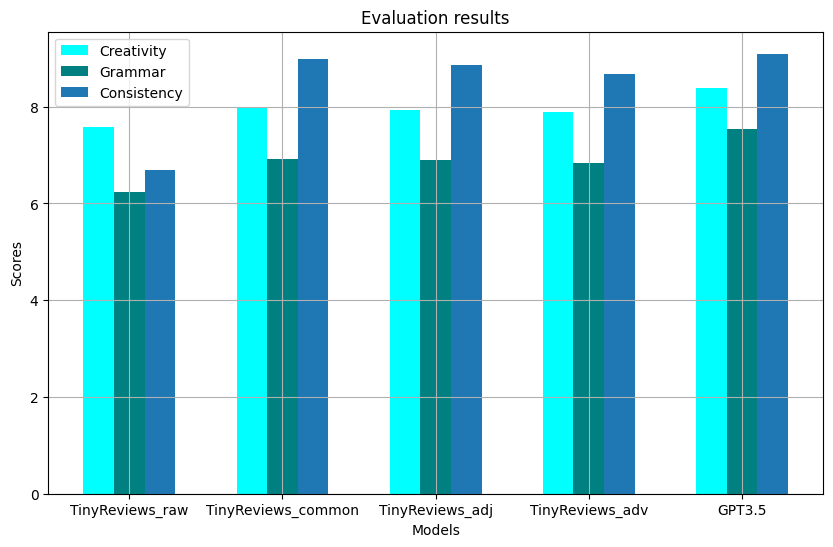

In [ ]:
plt.figure(figsize=(10,6))

width = 0.2
r1 = range(len(scores_df['Grammar']))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

plt.bar(r1, scores_df['Creativity'], width, color = 'aqua', label='Creativity')
plt.bar(r2, scores_df['Grammar'], width, color = 'teal', label='Grammar')
plt.bar(r3, scores_df['Consistency'], width, label='Consistency')

plt.title('Evaluation results')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks([r + width for r in range(len(r1))], scores_df.index)

plt.legend()
plt.grid()

plt.show()

Performance comparison between models:
The models trained on the filtered dataset improve all three scores significantly compared to the one trained on the raw dataset, as shown in Figure 99. The evaluation results from GPT-3.5 partially prove our hypothesis that higher-quality datasets lead to higher-quality completions from SLMs. The most significant improvement is observed in the grammar and consistency scores, indicating that the model trained on a filtered dataset is more capable of generating grammatically correct completions that also follow the logic and sentiment of the given prompts.

However, the differences in completion scores are subtle among the three models trained on different filtered datasets. One explanation is that these three straightforward metrics need to be more comprehensive, and we conducted a manual inspection later to evaluate the performance more carefully.

Comparable performance from SLM (Discussion/Conclusion):

We tested GPT-3.5 using the same 50 test reviews and found that our best model achieves performance comparable to GPT-3.5, shown on figure . Even an SLM with 1M parameters trained on 1M sentences can generate coherent reviews if we apply appropriate low-cost preprocessing techniques, such as removing uncommon words. In future work, readers can explore more low-cost techniques to improve dataset quality, which may further reduce the training costs for SLMs.

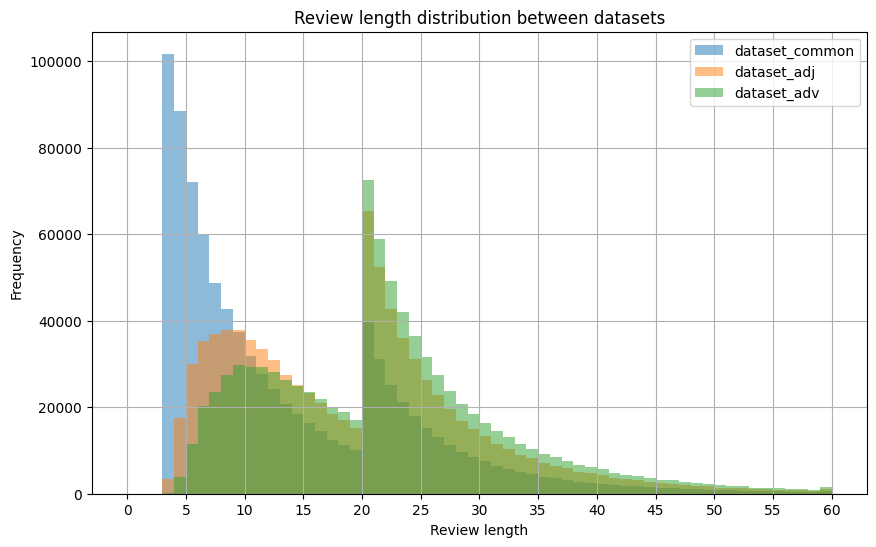

In [11]:
plot_word_counts_distribution([books_5_common.select(range(900*1000))['text'],
                               books_5_adj.select(range(900*1000))['text'],
                               books_5_adv.select(range(900*1000))['text']], ["dataset_common", "dataset_adj", "dataset_adv"])

GPT-eval: We manually select 50 unseen reviews from kindle review validation set and save the first half of each review as test dataset. We also make sure each model can generate at least 5 words from each test senteces (first half part of reviews). Then we prompt GPT-3.5 to evaluate each completions on their grammar, creativity and consistency with the first half in a score range from 1 to 10.

Example interaction is (our models' generation is highlighted and part produced by GPT-3.5 is in italic font):

In the following exercise, student is given a beginning of a comment about Amazon Book Review. The student needs to complete it into a complete comment. The exercise tests the student's language abilities and creativity. The symbol *** marks the separator between the prescribed beginning and the student’s completion:

I was hoping to find this one in book form. The story looks***like a good read. I would recommend it to anyone.

Now, grade the student’s completion in terms of grammar, creativity, and consistency with the comment's beginning. Each metric is ranging from 0 to 10. Please provide the information as a number array only, without additional explanation or text.

[8, 7, 9]


Inbalance of sentence length among datasets (Discussion):

## 5.2 Checkpoints comparison (result)


In [ ]:
dataset_val.select(range(10))["text"]

['ALMOST BEEN TOO LONG SINCE I READ IT. GOOD READ OR I WOULD NOT HAVE FINISHED IT',
 'I was hoping to find this one in book form. The story looks like it will be good when I get that far in the series.',
 'This true story is amazing.  All the things he did and got away with for so long, a nd the good person he is now.',
 'One of the most interesting books I have read in some time. It was well worth the time I spent',
 "I love this book. Strong woman who's the main perspective. The rest of the series are really drawing me in as well. I can't wait to take the trip together and get lost in another world.",
 "I enjoyed this book, but didn't think it was as good as the others.",
 'I like very good products.',
 "I didn't read the book yet but I'm sure it could possibly be a four.",
 'Learning history is learning the good the bad and the ugly.  I encourage to read this book and see how flawed their thinking was.',
 'It was an interesting read in 40+ years ago in HS but is really dated now.']

In [ ]:
# Choose it from the dataset_val
"""I didn't read the book yet but I'm sure it could possibly be a four."""

prompt = """I didn't read the book yet but"""

In [ ]:
def completion_models(model_type, model_name_list, tokenizer, prompt):
    for model_name in model_name_list:
        model_temp = AutoModelForCausalLM.from_pretrained(
            local_drive + "results_" + model_type+ "/checkpoint-" + model_name)

        print(model_name)
        print(complete_text(model_temp, tokenizer, prompt))

In [ ]:
# step_size = 8
model_name_list = ["5000","10000","30000", "60000", "90000", "120000"]

In [ ]:
completion_models("550", model_name_list, tokenizer, prompt)

5000
I have a book.
10000
I have read this book. I have read it. I have read it. I have to read it.
30000
I was a great book. I was a great book. I was a great read. I was a great book. I was a great read.
60000
I was a lot of the characters. I was a good read and I was a lot of the characters. I was a good read and I was a lot of the characters. I was a good read and I was a lot of the characters. I was a good read and I was a bit of the characters. I was a good read and I was a bit of the characters. I was a good read and I was a bit of the characters. I was a good read and I was a good book. I was a good read. I was a good read and I was a good book. I was a good read it. I was a good read. I was a good read. I was a good book. I was a good read it. I was a good read it. I was a good read it. I was a good book. I was a good read it. I was a good read it. I was a good read it. I was a good book. I was a good read it. I was a good read it. I was a good read. I was a good read. I was a

In [ ]:
completion_models("common", model_name_list, tokenizer, prompt)

5000
I a book.
10000
I was a good read it.
30000
it was a good read.
60000
I was not like it. I was a good read. I would recommend it to anyone.
90000
it was a good read.
120000
I was not disappointed.


In [ ]:
completion_models("adj", model_name_list, tokenizer, prompt)

5000
I I I I I I I I I I I I I I I I I I I I I I I I I I I I I I I I I I read.
10000
I was a good read it was a good book.
30000
it was a good read.
60000
it was a good read.
90000
I was looking forward to reading the next one.
120000
I was very happy with it.


In [ ]:
completion_models("adv", model_name_list, tokenizer, prompt)

5000
I
10000
I was a good book. I have read it. I have read it.
30000
it was a good read. I was a great read. I would recommend it to read it.
60000
I was not sure what I was going to get into it. I would recommend it.
90000
it was a good read.
120000
it was a good read. I enjoyed it very much.


Performance comparison between checkpoints:

We use a promp ,"I didn't read the book yet but", from validation set to evaluate the completions from different checkpoints.


In [ ]:
def upload_models(models_tuple, tokenizer, prompt):
    for model_type, check_point_num, hug_name in models_tuple:
        model_temp = AutoModelForCausalLM.from_pretrained(
            local_drive + "results_" + str(model_type)+ "/checkpoint-" + str(check_point_num))
        print(complete_text(model_temp, tokenizer, prompt))

        model_temp.push_to_hub(str(hug_name), token=token)
        tokenizer.push_to_hub(str(hug_name), token=token)

In [ ]:
upload_models([("550", 120000, "TinyReviews_raw"),
               ("common", 120000, "TinyReviews_common"),
               ("adj", 120000, "TinyReviews_adj"),
               ("adv", 120000, "TinyReviews_adv")], tokenizer, prompt,)